In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import regions
from astropy.table import *
from tqdm import tqdm
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.wcs import WCS
import matplotlib

plt.rc('font', family='serif'), plt.rc('xtick', labelsize=18), plt.rc('ytick', labelsize=18)
plt.rcParams['savefig.dpi'] = 100
plt.rc('text',usetex=True)
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
np.set_printoptions(precision=3)



In [3]:
# load v9 catalogs

# overall
cat = Table.read('clauds_cat_v2020/completeness_useful_params_cat/COSMOS_deep_v9_gal_cut_params_sfq_added.fits')
cat = cat[cat['inside_u'] == True]
cat = cat[cat['MASK'] == 0]  # unmasked
cat_gal = cat[cat['OBJ_TYPE'] == 0]  # galaxies

# inside_j
cat_inside_j = cat[cat['inside_j'] == True]


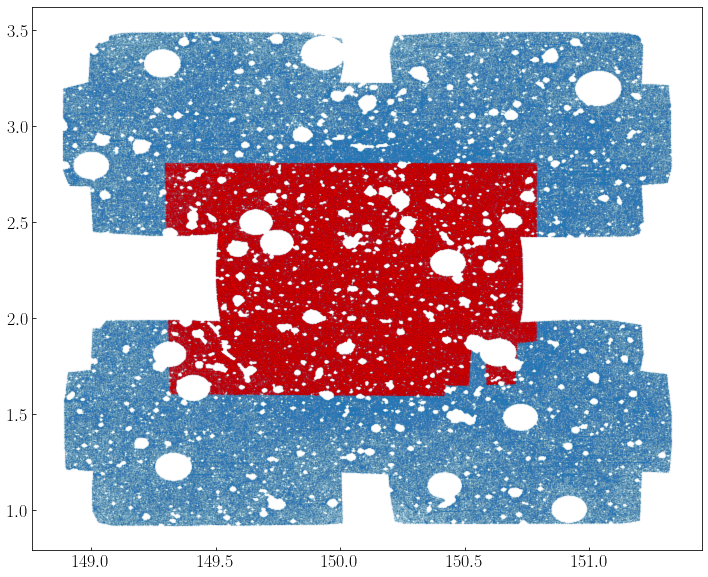

In [4]:
fig = plt.figure(figsize=(12,10))

plt.scatter(cat['RA'],cat['DEC'],s=0.1,alpha=0.1)
plt.scatter(cat_inside_j['RA'],cat_inside_j['DEC'],s=0.1,alpha=0.1,color='r')
plt.show()

In [5]:
# select i<26

#### N(z)

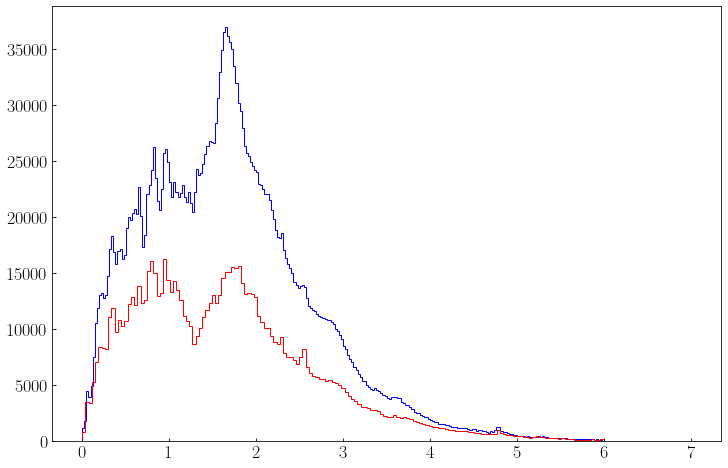

In [6]:
fig = plt.figure(figsize=(12,8))

plt.hist(cat['ZPHOT'],range=(0,7),bins='scott',histtype='step',color='b')
plt.hist(cat_inside_j['ZPHOT'],range=(0,7),bins='scott',histtype='step',color='r')
plt.show()

#### MASS_MED

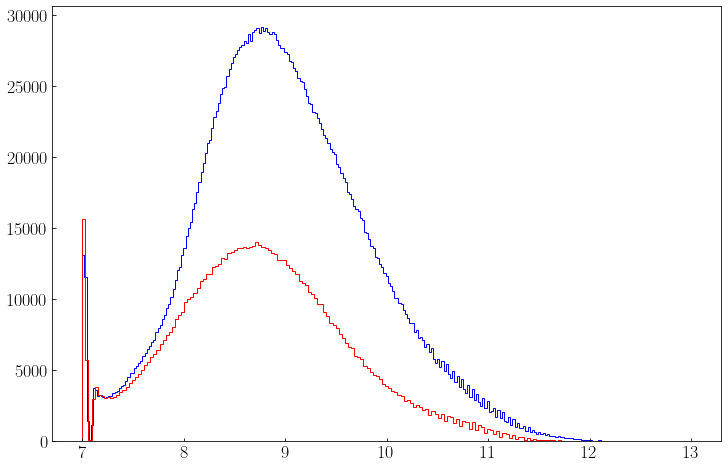

In [7]:
fig = plt.figure(figsize=(12,8))

plt.hist(cat['MASS_MED'],range=(7,13),bins='scott',histtype='step',color='b')
plt.hist(cat_inside_j['MASS_MED'],range=(7,13),bins='scott',histtype='step',color='r')
plt.show()

#### number density

In [8]:
# load in random point catalog

cat_random = Table.read('CUT_deep_catalogs/random_point_cat/COSMOS_deep_random_point.fits')
cat_random = cat_random[cat_random['inside'] == 0]
cat_random = cat_random[cat_random['MASK'] == 1]  # unmasked

cat_random_inside_j = cat_random[cat_random['inside_j']==0]

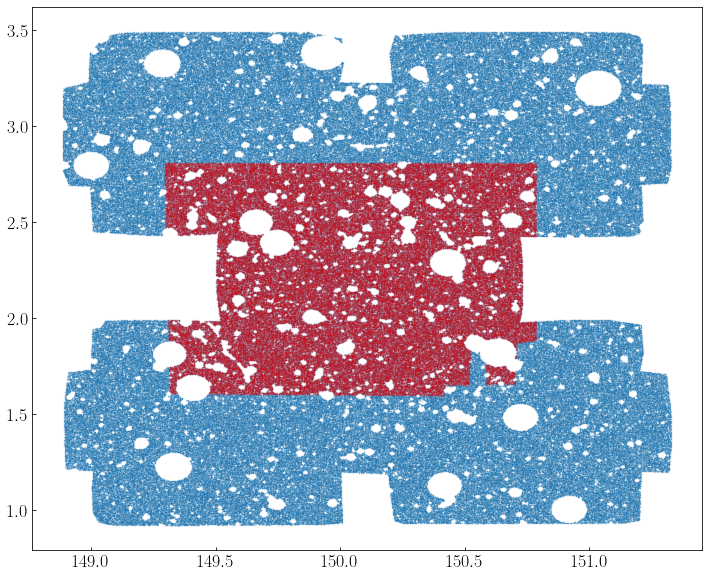

In [9]:
fig = plt.figure(figsize=(12,10))

plt.scatter(cat_random['RA'],cat_random['DEC'],s=0.1,alpha=0.3)
plt.scatter(cat_random_inside_j['RA'],cat_random_inside_j['DEC'],s=0.3,alpha=0.1,color='r')
plt.show()

In [12]:
cat_z = cat[abs(cat['ZPHOT']-0.6)<0.1]
cat_z_masscut = cat_z[cat_z['MASS_MED']>9.5]

cat_z_masscut_inside_j = cat_z_masscut[cat_z_masscut['inside_j'] == True]
print('overall:', len(cat_z_masscut)/len(cat_random))
print('inside_j', len(cat_z_masscut_inside_j)/len(cat_random_inside_j) )

overall: 0.030772407861487855
inside_j 0.03271904480661484


In [13]:
32.7/30.7

1.0651465798045603